In [1]:
#Imports

#Data analysis and math
import math
import datetime
import numpy as np
import pandas as pd
from scipy import stats as st

#Plotting
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("whitegrid")
sns.set_context({"figure.figsize": (15, 7.5)})

#Preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectPercentile

#Machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC

from sklearn.grid_search import GridSearchCV

#Metrics
from sklearn.cross_validation import train_test_split, cross_val_score, cross_val_predict

from sklearn.metrics import recall_score, precision_score, f1_score, make_scorer, classification_report

/home/greed/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/home/greed/anaconda3/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [2]:
df = pd.read_csv('prosperLoanData.csv')
df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [3]:
df.shape

(113937, 81)

In [4]:
df.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,...,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,...,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,...,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,...,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000,0.156290,0.134000,0.124200,0.115670,0.042400,0.074080,3.000000,4.000000,...,-73.180000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000
50%,6.005540e+05,36.000000,0.209760,0.184000,0.173000,0.161500,0.072400,0.091700,4.000000,6.000000,...,-34.440000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,44.000000
75%,8.926340e+05,36.000000,0.283810,0.250000,0.240000,0.224300,0.112000,0.116600,5.000000,8.000000,...,-13.920000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,115.000000
max,1.255725e+06,60.000000,0.512290,0.497500,0.492500,0.319900,0.366000,0.283700,7.000000,11.000000,...,32.060000,0.000000,25000.000000,25000.000000,21117.900000,1.012500,39.000000,33.000000,25000.000000,1189.000000


In [5]:
df.isnull().sum()

ListingKey                                  0
ListingNumber                               0
ListingCreationDate                         0
CreditGrade                             84984
Term                                        0
LoanStatus                                  0
ClosedDate                              58848
BorrowerAPR                                25
BorrowerRate                                0
LenderYield                                 0
EstimatedEffectiveYield                 29084
EstimatedLoss                           29084
EstimatedReturn                         29084
ProsperRating (numeric)                 29084
ProsperRating (Alpha)                   29084
ProsperScore                            29084
ListingCategory (numeric)                   0
BorrowerState                            5515
Occupation                               3588
EmploymentStatus                         2255
EmploymentStatusDuration                 7625
IsBorrowerHomeowner               

In [6]:
df.isnull().sum().max()

100596

In [7]:
categorical = df.select_dtypes(include=["object"]).columns.values
df[categorical] = df[categorical].fillna("Unknown")
df.select_dtypes(exclude=[np.number]).isnull().sum()

ListingKey                 0
ListingCreationDate        0
CreditGrade                0
LoanStatus                 0
ClosedDate                 0
ProsperRating (Alpha)      0
BorrowerState              0
Occupation                 0
EmploymentStatus           0
IsBorrowerHomeowner        0
CurrentlyInGroup           0
GroupKey                   0
DateCreditPulled           0
FirstRecordedCreditLine    0
IncomeRange                0
IncomeVerifiable           0
LoanKey                    0
LoanOriginationDate        0
LoanOriginationQuarter     0
MemberKey                  0
dtype: int64

In [8]:
borrower_fees = df["BorrowerAPR"] - df["BorrowerRate"]
df["BorrowerAPR"].fillna(df["BorrowerRate"] + borrower_fees.median(), inplace=True)

estimated_loss_from_fees = df["BorrowerRate"] - df["EstimatedEffectiveYield"]
df["EstimatedEffectiveYield"].fillna(df["BorrowerRate"] - estimated_loss_from_fees.median(), inplace=True)

df["EstimatedLoss"].fillna(df["EstimatedLoss"].median(), inplace=True)

df["EstimatedReturn"].fillna(df["EstimatedEffectiveYield"] - df["EstimatedLoss"], inplace=True)

df["ProsperRating (numeric)"].fillna(df["ProsperRating (numeric)"].median(), inplace=True)

df["ProsperScore"].fillna(df["ProsperScore"].median(), inplace=True)

df.dropna(subset=["EmploymentStatusDuration", "CreditScoreRangeLower", "FirstRecordedCreditLine", "CurrentCreditLines",
                  "TotalCreditLinespast7years"], inplace=True)

df["DebtToIncomeRatio"].fillna(df["MonthlyLoanPayment"] / (df["StatedMonthlyIncome"] + 1), inplace = True)

df.drop("ScorexChangeAtTimeOfListing", axis=1, inplace=True)

prosper_vars = ["TotalProsperLoans","TotalProsperPaymentsBilled", "OnTimeProsperPayments", "ProsperPaymentsLessThanOneMonthLate",
                "ProsperPaymentsOneMonthPlusLate", "ProsperPrincipalBorrowed", "ProsperPrincipalOutstanding"]

df[prosper_vars] = df[prosper_vars].fillna(0)

df.drop(["ListingKey", "ListingNumber", "LoanKey", "LoanNumber"], axis=1, inplace=True)

df.drop(["ListingCreationDate", "ClosedDate", "DateCreditPulled", "LoanOriginationDate", "LoanOriginationQuarter", "MemberKey"],
        axis=1, inplace=True)

df.drop(["LoanCurrentDaysDelinquent", "LoanFirstDefaultedCycleNumber", "LoanMonthsSinceOrigination", "LP_CustomerPayments",
         "LP_CustomerPrincipalPayments", "LP_InterestandFees", "LP_ServiceFees", "LP_CollectionFees", "LP_GrossPrincipalLoss",
         "LP_NetPrincipalLoss", "LP_NonPrincipalRecoverypayments"], axis=1, inplace=True)

In [9]:
df.isnull().sum()

CreditGrade                            0
Term                                   0
LoanStatus                             0
BorrowerAPR                            0
BorrowerRate                           0
LenderYield                            0
EstimatedEffectiveYield                0
EstimatedLoss                          0
EstimatedReturn                        0
ProsperRating (numeric)                0
ProsperRating (Alpha)                  0
ProsperScore                           0
ListingCategory (numeric)              0
BorrowerState                          0
Occupation                             0
EmploymentStatus                       0
EmploymentStatusDuration               0
IsBorrowerHomeowner                    0
CurrentlyInGroup                       0
GroupKey                               0
CreditScoreRangeLower                  0
CreditScoreRangeUpper                  0
FirstRecordedCreditLine                0
CurrentCreditLines                     0
OpenCreditLines 

In [10]:
df.shape

(106290, 59)

In [11]:
df["LoanStatus"].value_counts()

Current                   56566
Completed                 33530
Chargedoff                10632
Defaulted                  3289
Past Due (1-15 days)        806
Past Due (31-60 days)       363
Past Due (61-90 days)       313
Past Due (91-120 days)      304
Past Due (16-30 days)       265
FinalPaymentInProgress      205
Past Due (>120 days)         16
Cancelled                     1
Name: LoanStatus, dtype: int64

What is really of interest to us is what distinguishes completed loans from defaulted loans. Because there is no way to tell whether "current" loans will eventually default or not, we can't use them for our analysis. Nearly half of the dataset is not useful to us, as the loans are still outstanding. In order to be conservative in our eventual estimates, to simplify the problem, and to retain data, let's assume all the "past due" and "chargedoff" loans (and that 1 cancellation) will default. Thus we'll be left with two classes: "completed" and "defaulted". Let's encode those binary outcomes as 1 and 0, respectively.

In [12]:
#Remove outstanding loans

df_historical = df[df["LoanStatus"] != "Current"]

df_historical["LoanStatus"].value_counts()

Completed                 33530
Chargedoff                10632
Defaulted                  3289
Past Due (1-15 days)        806
Past Due (31-60 days)       363
Past Due (61-90 days)       313
Past Due (91-120 days)      304
Past Due (16-30 days)       265
FinalPaymentInProgress      205
Past Due (>120 days)         16
Cancelled                     1
Name: LoanStatus, dtype: int64

In [13]:
df_historical["LoanStatus"] = (df_historical["LoanStatus"] == "Completed").astype(int)
df_historical["LoanStatus"][:10]

/home/greed/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


0     1
11    1
12    0
15    0
21    1
23    0
26    1
27    1
30    1
33    1
Name: LoanStatus, dtype: int64

(0, 1)

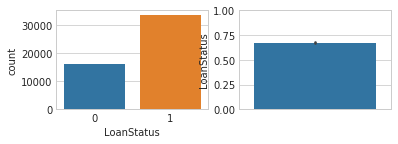

In [14]:
fig = plt.figure()

ax1 = fig.add_subplot(221)
sns.countplot(df_historical["LoanStatus"])

ax2 = fig.add_subplot(222)
sns.barplot(y=df_historical["LoanStatus"]).set_ylim([0,1])

In [15]:
df_historical["LoanStatus"].mean(), 1 - df_historical["LoanStatus"].mean()

(0.6743222588689567, 0.3256777411310433)

In [16]:
df_historical.replace(to_replace={"ListingCategory (numeric)": {0: "Unknown", 1: "Debt", 2: "Reno", 3: "Business", 4: "Personal",
                                                                5: "Student", 6: "Auto", 7: "Other", 8: "Baby", 9: "Boat", 
                                                                10: "Cosmetic", 11: "Engagement", 12: "Green", 13: "Household",
                                                                14: "LargePurchase", 15: "Medical", 16: "Motorcycle", 17: "RV",
                                                                18: "Taxes", 19: "Vacation", 20: "Wedding"}}, inplace=True)

df_historical.rename(index=str, columns={"ListingCategory (numeric)": "ListingCategory"}, inplace=True)

df_historical["ListingCategory"][:10]

/home/greed/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:5817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  regex=regex)
/home/greed/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3778: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


0       Unknown
11      Unknown
12         Debt
15    Household
21      Unknown
23      Medical
26         Debt
27         Debt
30      Wedding
33        Other
Name: ListingCategory, dtype: object

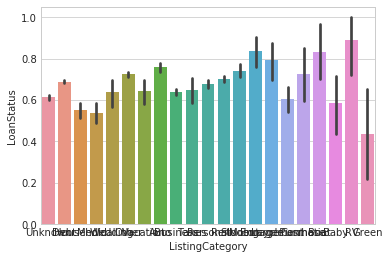

In [17]:
sns.barplot(x="ListingCategory", y="LoanStatus", data=df_historical)

In [18]:
credit_score_range = df_historical["CreditScoreRangeUpper"] - df_historical["CreditScoreRangeLower"]

credit_score_range.value_counts()

19.0    49724
dtype: int64

In [19]:
df_historical.drop("CreditScoreRangeUpper", axis=1, inplace=True)
df_historical.rename(index=str, columns={"CreditScoreRangeLower": "CreditScore"}, inplace=True)

/home/greed/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)
/home/greed/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3778: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


In [20]:
x = df_historical["EmploymentStatusDuration"]
y = df_historical["LoanStatus"]

r, p = st.pearsonr(x, y)

print("The correlation between employment status duration and loan default is {}, with a p-value of {}".format(r, p))

The correlation between employment status duration and loan default is -0.0059057028589972775, with a p-value of 0.1878775422194832


In [21]:
df_historical.drop("EmploymentStatusDuration", axis=1, inplace=True)

/home/greed/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


(0, 0.8)

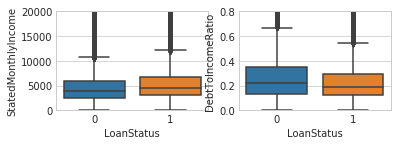

In [22]:
fig = plt.figure()

ax1 = fig.add_subplot(221)
sns.boxplot(x="LoanStatus", y="StatedMonthlyIncome", data=df_historical).set_ylim([0,20000])

ax2 = fig.add_subplot(222)
sns.boxplot(x="LoanStatus", y="DebtToIncomeRatio", data=df_historical).set_ylim([0,0.8])

(0, 2.5)

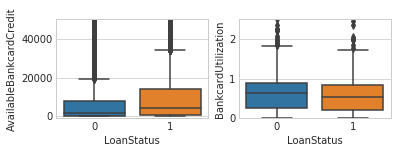

In [23]:
fig = plt.figure()

ax1 = fig.add_subplot(221)
sns.boxplot(x="LoanStatus", y="AvailableBankcardCredit", data=df_historical).set_ylim([-1000, 50000])

ax2 = fig.add_subplot(222)
sns.boxplot(x="LoanStatus", y="BankcardUtilization", data=df_historical).set_ylim([0,2.5])

(0, 1)

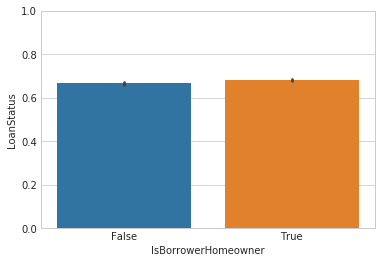

In [24]:
sns.barplot(x="IsBorrowerHomeowner", y="LoanStatus", data=df_historical).set_ylim([0,1])

(0, 20)

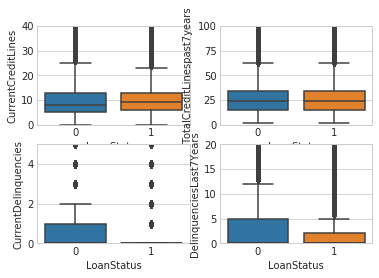

In [25]:
fig = plt.figure()

ax1 = fig.add_subplot(221)
sns.boxplot(x="LoanStatus", y="CurrentCreditLines", data=df_historical).set_ylim([0,40])

ax2 = fig.add_subplot(222)
sns.boxplot(x="LoanStatus", y="TotalCreditLinespast7years", data=df_historical).set_ylim([0,100])

ax3 = fig.add_subplot(223)
sns.boxplot(x="LoanStatus", y="CurrentDelinquencies", data=df_historical).set_ylim([0,5])

ax4 = fig.add_subplot(224)
sns.boxplot(x="LoanStatus", y="DelinquenciesLast7Years", data=df_historical).set_ylim([0,20])

In [26]:
delinquency = ["CurrentDelinquencies", "DelinquenciesLast7Years"]
y = df_historical["LoanStatus"]

for var in delinquency:
    x = df_historical[var]
    r, p = st.pearsonr(x, y)

    print("The correlation between {} and loan default is {}, with a p-value of {}".format(var, r, p))

The correlation between CurrentDelinquencies and loan default is -0.12107063477741749, with a p-value of 1.0845242651745478e-161
The correlation between DelinquenciesLast7Years and loan default is -0.06975250066577986, with a p-value of 1.1176410321268129e-54


In [27]:
df_historical.drop(["CreditGrade", "BorrowerAPR", "LenderYield", "EstimatedEffectiveYield", "EstimatedLoss", "EstimatedReturn",
                 "ProsperRating (Alpha)", "Occupation", "CurrentlyInGroup", "GroupKey", "IncomeRange", "PercentFunded"], axis=1,
                inplace=True)

df_historical.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49724 entries, 0 to 113935
Data columns (total 45 columns):
Term                                   49724 non-null int64
LoanStatus                             49724 non-null int64
BorrowerRate                           49724 non-null float64
ProsperRating (numeric)                49724 non-null float64
ProsperScore                           49724 non-null float64
ListingCategory                        49724 non-null object
BorrowerState                          49724 non-null object
EmploymentStatus                       49724 non-null object
IsBorrowerHomeowner                    49724 non-null bool
CreditScore                            49724 non-null float64
FirstRecordedCreditLine                49724 non-null object
CurrentCreditLines                     49724 non-null float64
OpenCreditLines                        49724 non-null float64
TotalCreditLinespast7years             49724 non-null float64
OpenRevolvingAccounts                 

/home/greed/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [28]:
df_historical["IsBorrowerHomeowner"] = df_historical["IsBorrowerHomeowner"].astype(int)
df_historical["IncomeVerifiable"] = df_historical["IncomeVerifiable"].astype(int)

df_historical["IsBorrowerHomeowner"][:10], df_historical["IncomeVerifiable"][:10]

/home/greed/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/greed/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


(0     1
 11    0
 12    0
 15    1
 21    0
 23    0
 26    0
 27    1
 30    0
 33    0
 Name: IsBorrowerHomeowner, dtype: int64, 0     1
 11    1
 12    1
 15    1
 21    1
 23    1
 26    1
 27    1
 30    1
 33    1
 Name: IncomeVerifiable, dtype: int64)

In [29]:
df_historical["FirstRecordedCreditLine"][:10]

0     2001-10-11 00:00:00
11    2000-11-13 00:00:00
12    1996-11-09 00:00:00
15    1999-03-08 00:00:00
21    2003-06-20 00:00:00
23    1998-06-09 00:00:00
26    1975-10-26 00:00:00
27    2000-04-11 00:00:00
30    1988-06-01 00:00:00
33    2003-12-01 00:00:00
Name: FirstRecordedCreditLine, dtype: object

In [30]:
first_credit_year = df_historical["FirstRecordedCreditLine"].str[:4]

df_historical["YearsWithCredit"] = 2014 - pd.to_numeric(first_credit_year)

df_historical.drop("FirstRecordedCreditLine", axis=1, inplace=True)

df_historical["YearsWithCredit"][:10]

/home/greed/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/greed/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


0     13
11    14
12    18
15    15
21    11
23    16
26    39
27    14
30    26
33    11
Name: YearsWithCredit, dtype: int64

In [31]:
category = pd.get_dummies(df_historical["ListingCategory"])

df_historical = df_historical.join(category, rsuffix="_category")
df_historical.drop("ListingCategory", axis=1, inplace=True)

df_historical.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49724 entries, 0 to 113935
Data columns (total 65 columns):
Term                                   49724 non-null int64
LoanStatus                             49724 non-null int64
BorrowerRate                           49724 non-null float64
ProsperRating (numeric)                49724 non-null float64
ProsperScore                           49724 non-null float64
BorrowerState                          49724 non-null object
EmploymentStatus                       49724 non-null object
IsBorrowerHomeowner                    49724 non-null int64
CreditScore                            49724 non-null float64
CurrentCreditLines                     49724 non-null float64
OpenCreditLines                        49724 non-null float64
TotalCreditLinespast7years             49724 non-null float64
OpenRevolvingAccounts                  49724 non-null int64
OpenRevolvingMonthlyPayment            49724 non-null float64
InquiriesLast6Months                 

In [32]:
employment = pd.get_dummies(df_historical["EmploymentStatus"])

df_historical = df_historical.join(employment, rsuffix="_employmentstatus")
df_historical.drop("EmploymentStatus", axis=1, inplace=True)

df_historical.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49724 entries, 0 to 113935
Data columns (total 71 columns):
Term                                   49724 non-null int64
LoanStatus                             49724 non-null int64
BorrowerRate                           49724 non-null float64
ProsperRating (numeric)                49724 non-null float64
ProsperScore                           49724 non-null float64
BorrowerState                          49724 non-null object
IsBorrowerHomeowner                    49724 non-null int64
CreditScore                            49724 non-null float64
CurrentCreditLines                     49724 non-null float64
OpenCreditLines                        49724 non-null float64
TotalCreditLinespast7years             49724 non-null float64
OpenRevolvingAccounts                  49724 non-null int64
OpenRevolvingMonthlyPayment            49724 non-null float64
InquiriesLast6Months                   49724 non-null float64
TotalInquiries                      

In [33]:
state_defaults = df_historical.groupby("BorrowerState")["LoanStatus"].mean()

vlow_risk = sorted(state_defaults)[51]
low_risk = sorted(state_defaults)[40]
mid_risk = sorted(state_defaults)[29]
high_risk = sorted(state_defaults)[19]
vhigh_risk = sorted(state_defaults)[9]

new_geography = {}

for state in state_defaults.index:
    if high_risk > state_defaults[state]:
        v = "StateVeryHighRisk"
    elif mid_risk > state_defaults[state] >= high_risk:
        v = "StateHighRisk"
    elif low_risk > state_defaults[state] >= mid_risk:
        v = "StateMidRisk"
    elif vlow_risk > state_defaults[state] >= low_risk:
        v = "StateLowRisk"
    else:
        v = "StateVeryLowRisk"
    new_geography[state] = v

df_historical.replace(to_replace={"BorrowerState": new_geography}, inplace=True)
                               
df_historical["BorrowerState"][:10]

0          StateLowRisk
11    StateVeryHighRisk
12    StateVeryHighRisk
15    StateVeryHighRisk
21        StateHighRisk
23        StateHighRisk
26         StateLowRisk
27         StateLowRisk
30        StateHighRisk
33        StateHighRisk
Name: BorrowerState, dtype: object

In [34]:
state = pd.get_dummies(df_historical["BorrowerState"])

df_historical = df_historical.join(state, rsuffix="_state")
df_historical.drop("BorrowerState", axis=1, inplace=True)

df_historical.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49724 entries, 0 to 113935
Data columns (total 75 columns):
Term                                   49724 non-null int64
LoanStatus                             49724 non-null int64
BorrowerRate                           49724 non-null float64
ProsperRating (numeric)                49724 non-null float64
ProsperScore                           49724 non-null float64
IsBorrowerHomeowner                    49724 non-null int64
CreditScore                            49724 non-null float64
CurrentCreditLines                     49724 non-null float64
OpenCreditLines                        49724 non-null float64
TotalCreditLinespast7years             49724 non-null float64
OpenRevolvingAccounts                  49724 non-null int64
OpenRevolvingMonthlyPayment            49724 non-null float64
InquiriesLast6Months                   49724 non-null float64
TotalInquiries                         49724 non-null float64
CurrentDelinquencies               

In [35]:
X = df_historical.drop("LoanStatus", axis=1)
y = df_historical["LoanStatus"]

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [37]:
X_train.shape, y_test.shape

((44751, 74), (4973,))

In [38]:
scaler = MinMaxScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [39]:
pca = PCA(n_components=10)
pca.fit(X_train_scaled)

X_train_pca10 = pca.transform(X_train_scaled)
X_test_pca10 = pca.transform(X_test_scaled)

pca.explained_variance_ratio_

array([0.17670123, 0.11838247, 0.09699779, 0.08818248, 0.07777252,
       0.05738194, 0.05187247, 0.04803877, 0.04100425, 0.03370393])

In [40]:
pca = PCA(n_components=3)
pca.fit(X_train)

X_train_pca3 = pca.transform(X_train_scaled)
X_test_pca3 = pca.transform(X_test_scaled)

pca.explained_variance_ratio_

array([0.68228994, 0.24762512, 0.02503526])

In [41]:
X_train_reduce50 = SelectPercentile(percentile=50).fit_transform(X_train_scaled, y_train)
X_test_reduce50 = SelectPercentile(percentile=50).fit_transform(X_test_scaled, y_test)

X_train_reduce10 = SelectPercentile().fit_transform(X_train_scaled, y_train)
X_test_reduce10 = SelectPercentile().fit_transform(X_test_scaled, y_test)

In [42]:
import warnings

models = {"Logistic Regression": LogisticRegression(), "Linear Discriminant Analysis": LinearDiscriminantAnalysis(),
          "Gaussian Naive Bayes": GaussianNB(), "Decision Tree Classifier": DecisionTreeClassifier(),
          "Random Forest Classifier": RandomForestClassifier(), "AdaBoost Classifier": AdaBoostClassifier()}

data = {"": X_train, "(scaled data)": X_train_scaled, "(PCA: 10 components)": X_train_pca10, "(PCA: 3 components)": X_train_pca3,
        "(50% of features)": X_train_reduce50, "(10% of features)": X_train_reduce10}

res = {}

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    
    for name, model in models.items():
        for scale, X in data.items():
            n = name + " " + scale
            clf = model
            s0, m0 = datetime.datetime.now().time().second, datetime.datetime.now().time().minute
            acc = cross_val_score(clf, X, y_train).mean()
            s1, m1 = datetime.datetime.now().time().second, datetime.datetime.now().time().minute
            y_pred = cross_val_predict(clf, X, y_train)
            default_recall = make_scorer(recall_score, pos_label=0, average="binary")
            default_precision = make_scorer(precision_score, pos_label=0, average="binary")
            default_fscore = make_scorer(f1_score, pos_label=0, average="binary")
            rec = cross_val_score(clf, X, y_train, scoring=default_recall).mean()
            prec = cross_val_score(clf, X, y_train, scoring=default_precision).mean()
            f1 = cross_val_score(clf, X, y_train, scoring=default_fscore).mean()
            m_delta = m1 - m0
            s_delta = s1 - s0
            if s_delta < 0:
                s_delta = 60 + s_delta
                m_delta -= 1

            res[n] = {"MeanAccuracy": acc, "Precision": prec, "Recall": rec, "F1Score": f1, 
                      "TrainingTime (m)": m_delta, "TrainingTime (s)": s_delta}

results = pd.DataFrame.from_dict(res, orient="index")
results = results[["MeanAccuracy", "Precision", "Recall", "F1Score", "TrainingTime (m)", "TrainingTime (s)"]]

results

,MeanAccuracy,Precision,Recall,F1Score,TrainingTime (m),TrainingTime (s)
AdaBoost Classifier,0.710643,0.596942,0.344764,0.437069,0,12
AdaBoost Classifier (10% of features),0.688454,0.566568,0.186544,0.280643,0,4
AdaBoost Classifier (50% of features),0.706979,0.590977,0.328373,0.421956,0,10
AdaBoost Classifier (PCA: 10 components),0.680678,0.530175,0.176188,0.264448,0,11
AdaBoost Classifier (PCA: 3 components),0.672901,0.485894,0.058021,0.103625,0,3
AdaBoost Classifier (scaled data),0.710643,0.596942,0.344764,0.437069,0,16
Decision Tree Classifier,0.629841,0.431512,0.441329,0.434323,0,4
Decision Tree Classifier (10% of features),0.603026,0.396558,0.424045,0.412196,0,1
Decision Tree Classifier (50% of features),0.627517,0.429128,0.443454,0.439045,0,3
Decision Tree Classifier (PCA: 10 components),0.611316,0.404357,0.419518,0.409501,0,2


In [47]:
results["Recall"].idxmax(), results["Recall"].max()

('Gaussian Naive Bayes (scaled data)', 0.6650539031721078)

In [48]:
default_recall = make_scorer(recall_score, pos_label=0)

param_grid = {"class_weight": ["balanced", {0: 2, 1: 1}, {0: 5, 1: 1}, {0: 10, 1: 1}], "min_samples_split": [2, 3, 5, 10, 20]}

forest = RandomForestClassifier()
clf = GridSearchCV(forest, param_grid=param_grid, scoring=default_recall)

clf.fit(X_train_reduce50, y_train)

clf.best_params_, clf.best_score_ 

({'class_weight': {0: 10, 1: 1}, 'min_samples_split': 20}, 0.7401413845668401)

In [49]:
(.7389 - .4581) / .4581

0.6129666011787819

In [50]:
default_precision = make_scorer(precision_score, pos_label=0, average="binary")
default_fscore = make_scorer(f1_score, pos_label=0, average="binary")

rec = cross_val_score(clf, X_train_reduce50, y_train, scoring=default_recall).mean()
prec = cross_val_score(clf, X_train_reduce50, y_train, scoring=default_precision).mean()
f = cross_val_score(clf, X_train_reduce50, y_train, scoring=default_fscore).mean()


print(" Recall: {} \n Precision: {} \n F1 Score: {}".format(rec, prec, f))

 Recall: 0.7369179514226639 
 Precision: 0.43694604762494843 
 F1 Score: 0.5513736781183208
